In [2]:
import numpy as np
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.svm import SVR
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

In [3]:
cleanmeta = pd.read_csv("actormetaMonths.csv")
cleanmeta = cleanmeta[['budget','revenue','popularity','runtime','castRevBudRatio','january','february','march','april','may','june','july','august','september','october','november','december']]
cleanmeta = cleanmeta.dropna()
cleanmeta = cleanmeta.reset_index()
#X = cleanmeta.values
#y = cleanmeta['revenue']/cleanmeta['budget'].values
X = cleanmeta[['budget','popularity','runtime','castRevBudRatio','january','february','march','april','may','june','july','august','september','october','november','december']].values
y = cleanmeta['revenue']/cleanmeta['budget'].values

In [4]:
for i in range(0,len(y)):
    if y[i] > 2:
        y[i] = 1 #success
    else:
        y[i] = 0 #failure

In [5]:
X_train = X[:4500]
X_test = X[4500:]

y_train = y[:4500]
y_test = y[4500:]

In [6]:
#X_train[0:5]

In [7]:
print(y_train[0:5])

0    1.0
1    1.0
2    1.0
3    1.0
4    0.0
Name: revenue, dtype: float64


In [8]:
print(X_train[0:5])

[[3.00000000e+07 2.19469430e+01 8.10000000e+01 7.79153871e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 1.00000000e+00 0.00000000e+00 0.00000000e+00]
 [6.50000000e+07 1.70155390e+01 1.04000000e+02 4.17657043e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 1.00000000e+00]
 [1.60000000e+07 3.85949500e+00 1.27000000e+02 3.11575245e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 1.00000000e+00]
 [6.00000000e+07 1.79249270e+01 1.70000000e+02 3.38450754e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 1.00000000e+00]
 [3.

In [9]:
print(y_train)

0       1.0
1       1.0
2       1.0
3       1.0
4       0.0
5       1.0
6       0.0
7       0.0
8       0.0
9       1.0
10      1.0
11      0.0
12      1.0
13      0.0
14      1.0
15      0.0
16      1.0
17      1.0
18      0.0
19      1.0
20      1.0
21      1.0
22      1.0
23      0.0
24      1.0
25      1.0
26      1.0
27      1.0
28      0.0
29      1.0
       ... 
4470    1.0
4471    1.0
4472    0.0
4473    0.0
4474    1.0
4475    0.0
4476    1.0
4477    1.0
4478    1.0
4479    1.0
4480    1.0
4481    0.0
4482    1.0
4483    0.0
4484    0.0
4485    0.0
4486    0.0
4487    0.0
4488    1.0
4489    0.0
4490    1.0
4491    1.0
4492    1.0
4493    0.0
4494    1.0
4495    1.0
4496    0.0
4497    1.0
4498    1.0
4499    1.0
Name: revenue, Length: 4500, dtype: float64


In [10]:
X_train = np.array(X_train)
y_train = np.array(y_train)

In [11]:

#clf = SVC(kernel = 'linear', C = 1.0)
#clf.fit(X_train, y_train) 
#y_train = y_train.reshape(1, -1)
clf=SVR()
clf.fit(X_train,y_train)
clf.score(X_test, y_test)

/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


-0.04714576065196895

In [12]:
#X_train[0:4]

In [13]:
#print(X_test[0])
#print(y_test[0:10])

In [14]:
result = clf.predict(X_test)
result[0:10]

array([0.12136478, 0.76687122, 0.38954583, 0.55145525, 0.55145525,
       0.55145525, 0.52733994, 0.64914977, 0.55150201, 0.551453  ])

In [15]:
print( clf.dual_coef_[0])

[0.41063694 0.58251481 0.82008386 ... 0.34858321 0.75861961 0.34868304]


In [16]:
#accuracy rbf kernel
print("scoring=accuracy")
asvc=SVC()
asvc.fit(X_train,y_train)
print("rbf svc score: %.4f" % asvc.score(X_test, y_test))
rbfscores = cross_val_score(asvc, X_train, y_train, cv=10, scoring='accuracy')
#print (scores)
print ("Average rbf score is " + str(rbfscores.mean()), "\n")

#linear kernel
#alinsvc=SVC(kernel='linear')
#alinsvc.fit(X_train,y_train)
#print("linear svc score: %.4f" % alinsvc.score(X_test, y_test))
#linearscores = cross_val_score(alinsvc, X_train, y_train, cv=10, scoring='accuracy')
#print (scores)
#print ("Average linear score is " + str(linearscores.mean()), "\n")

#poly kernel
apolysvc=SVC(kernel='poly')
apolysvc.fit(X_train,y_train)
print("poly svc score: %.4f" % apolysvc.score(X_test, y_test))
polyscores = cross_val_score(apolysvc, X_train, y_train, cv=10, scoring='accuracy')
#print (scores)
print ("Average poly score is " + str(polyscores.mean()), "\n")

#sigmoid kernel
asigsvc=SVC(kernel='sigmoid')
asigsvc.fit(X_train,y_train)
print("sigmoid svc score: %.4f" % asigsvc.score(X_test, y_test))
sigmoidscores = cross_val_score(asigsvc, X_train, y_train, cv=10, scoring='accuracy')
#print (scores)
print ("Average sigmoid score is " + str(sigmoidscores.mean()), "\n")


scoring=accuracy


/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


rbf svc score: 0.5732


/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default 

Average rbf score is 0.5648461923817457 

poly svc score: 0.4972


/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default 

Average poly score is 0.5124444927300053 

sigmoid svc score: 0.4972


/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default 

Average sigmoid score is 0.5124444927300053 



In [17]:
#do cross val for scoring=precision, recall, f1score

In [18]:
#recall rbf kernel

svc=SVC()
svc.fit(X_train,y_train)
rbfsvcpred = svc.predict(X_test)
precision_rbf_svc = precision_score(y_test, rbfsvcpred)
recall_rbf_svc = recall_score(y_test, rbfsvcpred)
f1_rbf_svc = f1_score(y_test, rbfsvcpred)
print("precision rbf: ", precision_rbf_svc)
print("recall rbf: ", recall_rbf_svc)
print("f1 rbf: ", f1_rbf_svc)

#linear kernel
#linsvc=SVC(kernel='linear')
#linsvc.fit(X_train,y_train)
#linsvcpred = linsvc.predict(X_test)
#precision_linear_svc = precision_score(y_test, linsvcpred)
#recall_linear_svc = recall_score(y_test, linsvcpred)
#f1_linear_svc = f1_score(y_test, linsvcpred)
#print("precision linear: ", precision_linear_svc)
#print("recall rbf: ", recall_linear_svc)
#print("f1 rbf: ", f1_linear_svc)

#poly kernel
polysvc=SVC(kernel='poly')
polysvc.fit(X_train,y_train)
polysvcpred = polysvc.predict(X_test)
precision_poly_svc = precision_score(y_test, polysvcpred)
recall_poly_svc = recall_score(y_test, polysvcpred)
f1_poly_svc = f1_score(y_test, polysvcpred)
print("precision poly: ", precision_poly_svc)
print("recall rbf: ", recall_poly_svc)
print("f1 rbf: ", f1_poly_svc)

#sigmoid kernel
sigsvc=SVC(kernel='sigmoid')
sigsvc.fit(X_train,y_train)
sigsvcpred = sigsvc.predict(X_test)
precision_sig_svc = precision_score(y_test, sigsvcpred)
recall_sig_svc = recall_score(y_test, sigsvcpred)
f1_sig_svc = f1_score(y_test, sigsvcpred)
print("precision sigmoid: ", precision_sig_svc)
print("recall rbf: ", recall_sig_svc)
print("f1 rbf: ", f1_sig_svc)


/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


precision rbf:  0.5482866043613707
recall rbf:  0.8036529680365296
f1 rbf:  0.6518518518518518
precision poly:  0.49716231555051077
recall rbf:  1.0
f1 rbf:  0.664139499620925


/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


precision sigmoid:  0.49716231555051077
recall rbf:  1.0
f1 rbf:  0.664139499620925


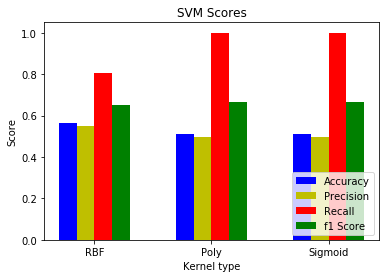

In [19]:
N = 3

ind = np.arange(N)
width = 0.15
fig, ax = plt.subplots()

#accu = [rbfscores.mean(), linearscores.mean(), polyscores.mean(), sigmoidscores.mean()]
#rects1 = ax.bar(ind, accu, width, color='b')
#prec = [precision_rbf_svc, precision_linear_svc, precision_poly_svc, precision_sig_svc]
#rects2 = ax.bar(ind+width, prec, width, color='y')
#rec = [recall_rbf_svc, recall_linear_svc, recall_poly_svc, recall_sig_svc]
#rects3 = ax.bar(ind + width * width, rec, width, color='r')
#f1score = [f1_rbf_svc, f1_linear_svc, f1_poly_svc, f1_sig_svc]
#rects4 = ax.bar(ind+ 2 * width, f1score,  width, color='g')


accu = [rbfscores.mean(), polyscores.mean(), sigmoidscores.mean()]
rects1 = ax.bar(ind, accu, width, color='b')
prec = [precision_rbf_svc, precision_poly_svc, precision_sig_svc]
rects2 = ax.bar(ind+width, prec, width, color='y')
rec = [recall_rbf_svc, recall_poly_svc, recall_sig_svc]
rects3 = ax.bar(ind + 2 * width, rec, width, color='r')
f1score = [f1_rbf_svc, f1_poly_svc, f1_sig_svc]
rects4 = ax.bar(ind+ 3 * width, f1score,  width, color='g')
#f1score = [f1_rbf_svc, f1_linear_svc, f1_poly_svc, f1_sig_svc]
#rects4 = ax.bar(ind+ 3 * width, f1score,  width, color='g')


ax.set_ylabel('Score')
ax.set_title('SVM Scores')
ax.set_xticks(ind + 1.5*width)
#ax.set_xticklabels(('RBF', 'Linear', 'Poly', 'Sigmoid'))
ax.set_xticklabels(('RBF', 'Poly', 'Sigmoid'))
ax.set_xlabel('Kernel type')
ax.legend((rects1[0], rects2[0], rects3[0],rects4[0]), ('Accuracy', 'Precision', 'Recall','f1 Score'), loc=4)

plt.show()

In [20]:
#svc w/ C, degree, tol, max_iter, decision_function_shape

In [21]:
svc=SVC(C=0.05)
svc.fit(X_train,y_train)
rbfsvcpred1 = svc.predict(X_test)
rbfscores1 = cross_val_score(svc, X_train, y_train, cv=10, scoring='accuracy')
precision_rbf_svc1 = precision_score(y_test, rbfsvcpred1)
recall_rbf_svc1 = recall_score(y_test, rbfsvcpred1)
f1_rbf_svc1 = f1_score(y_test, rbfsvcpred1)
print("precision rbf: ", precision_rbf_svc1)
print("recall rbf: ", recall_rbf_svc1)
print("f1 rbf: ", f1_rbf_svc1)

svc=SVC(C=0.1)
svc.fit(X_train,y_train)
rbfsvcpred1 = svc.predict(X_test)
rbfscores1 = cross_val_score(svc, X_train, y_train, cv=10, scoring='accuracy')
precision_rbf_svc1 = precision_score(y_test, rbfsvcpred1)
recall_rbf_svc1 = recall_score(y_test, rbfsvcpred1)
f1_rbf_svc1 = f1_score(y_test, rbfsvcpred1)
print("precision rbf: ", precision_rbf_svc1)
print("recall rbf: ", recall_rbf_svc1)
print("f1 rbf: ", f1_rbf_svc1)

/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default 

precision rbf:  0.49716231555051077
recall rbf:  1.0
f1 rbf:  0.664139499620925


/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default 

precision rbf:  0.49716231555051077
recall rbf:  1.0
f1 rbf:  0.664139499620925


In [22]:
'''
***AttributeError: coef_ is only available when using a linear kernel***



#weights = svc.coef_[0]
#importances = np.abs(weights)

indices = np.argsort(importances)[::-1]
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.ylabel("Score")
plt.xlabel("Label")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()
'''

'\n***AttributeError: coef_ is only available when using a linear kernel***\n\n\n\n#weights = svc.coef_[0]\n#importances = np.abs(weights)\n\nindices = np.argsort(importances)[::-1]\nprint("Feature ranking:")\n\nfor f in range(X.shape[1]):\n    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))\n\n# Plot the feature importances of the forest\nplt.figure()\nplt.title("Feature importances")\nplt.ylabel("Score")\nplt.xlabel("Label")\nplt.bar(range(X.shape[1]), importances[indices],\n       color="r", align="center")\nplt.xticks(range(X.shape[1]), indices)\nplt.xlim([-1, X.shape[1]])\nplt.show()\n'

In [24]:
#accuracy rbf kernel
print("scoring=accuracy")
svc=SVC()
svc.fit(X_train,y_train)
#rbfscores = cross_val_score(asvc, X_train, y_train, cv=10, scoring='accuracy')

scores = cross_val_score(svc, X_test, y_test, cv=10).mean()
p = cross_val_score(svc , X_test, y_test, cv=10, scoring='precision').mean()
r = cross_val_score(svc , X_test, y_test, cv=10, scoring='recall').mean()
f1 = cross_val_score(svc , X_test, y_test, cv=10, scoring='f1').mean()


#alinsvc=SVC(kernel='linear')
#alinsvc.fit(X_train,y_train)
#print("linear svc score: %.4f" % alinsvc.score(X_test, y_test))
#linearscores = cross_val_score(alinsvc, X_train, y_train, cv=10, scoring='accuracy')
#print (scores)
#print ("Average linear score is " + str(linearscores.mean()), "\n")

#apolysvc=SVC
#apolysvc.fit(X_train,y_train)
#polyscores = cross_val_score(apolysvc, X_train, y_train, cv=10, scoring='recall')

#sigmoid kernel
#asigsvc=SVC
#asigsvc.fit(X_train,y_train)
#print("sigmoid svc score: %.4f" % asigsvc.score(X_test, y_test))
#sigmoidscores = cross_val_score(asigsvc, X_train, y_train, cv=10, scoring='f1')


scoring=accuracy


/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default 

/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default 

0.5198280264872671 0.5125498825201048 0.7787526427061311 0.6170686901182707


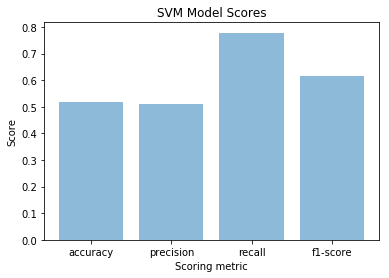

In [27]:
objects = scores, p, r, f1
y_pos = np.arange(len(objects))
 
plt.bar(y_pos, objects, align='center', alpha=0.5)
plt.xticks([0, 1, 2, 3], ["accuracy", "precision", "recall", "f1-score"])
plt.ylabel('Score')
plt.xlabel('Scoring metric')
plt.title('SVM Model Scores')

print (scores, p, r, f1)

plt.show()